# Initial Questions
1. What are the downsides of development? 

# Profile

* Where did the data set come from (provenance)? What's in it?
    * The data is sourced from multiple locations and aggregated by The World Bank. Seems to mostly come from large, inter-governmental institutions, like the United Nations. I did not investigate tertiary sources in the hierarchy
        * Environmental Center 
        * Food and Agriculture Organization
        * Internal Displacement Monitoring Centre. 
        * World Health Organization
    
* How big is data set (how many rows? how many variables? file size?).
* What types of data variables present? What are the dimensions/type?
* What is the overall perceived quality of the data? What's missing? What do you wish it included? Any noticeable outliers? Any other anomalous or curious things that jump out at you?


# Variables to consider
## Positive indicators
* GDP per capita (current US$)
* GNI per capita, Atlas method (current US$)
* Literacy rate, adult total (% of people ages 15 and above)
* Mortality rate, infant (per 1,000 live births)
* Current health expenditure (% of GDP)
* Access to electricity (% population)
* industry (including construction), value added (% of GDP)

## Potentially negative indicators
* Rural population (% of total population)
* Urban population (% of total population)
* Total greenhouse gas emitions (kt)
* Forest area (% of land)
* Agriculture, forestry, fishing, value added (% of GDP)
* level of water stress
* Livestock production index (2014-2016 = 100)
* Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)
* Cause of death, by non-communicable diseases (% of total)
* Droughts, floods, extreme temperatures (% of population, average 1990-2009)
* Death rate, crude (per 1,000 people)
* Suicide mortality rate (per 100,000 population)
* Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)
* PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
* CO2 emissions metric tons per capita

## Dropped indicators
* Bird, fish, mammal, plant species (threatened)
    * Data is too sparse--single entry for each per country. Also the number of threatened species is not normalized by the number of species in that country, so comparisons wouldn't make much sense. 
    TODO: visualization that demonstates sparseness

I did some filtering on the world bank webite. I looked through the variables and decided what was relevant to my question. Domain knowledge would have been helpful here. I pulled data for all years (1960 to 2019) and each of the above variables. Where possible, I chose variables that had already been normalized per capita. I do not yet know the fullness of the data. 

In [113]:
import pandas as pd
import numpy as np
import requests

pd.set_option('display.max.columns', None)
pd.set_option('display.precision', 2)

df = pd.read_csv('data/world_indicators_data.csv', na_values='..')

# Standardize column names: replace spaces with underscores and upper-case with lower-case
df.columns = [c.lower().replace(' ', '_').replace('(', '').replace(')', ''). replace('%', 'percent') for c in df.columns]

df.head(1)

,country_name,country_code,series_name,series_code,1960_[yr1960],1961_[yr1961],1962_[yr1962],1963_[yr1963],1964_[yr1964],1965_[yr1965],1966_[yr1966],1967_[yr1967],1968_[yr1968],1969_[yr1969],1970_[yr1970],1971_[yr1971],1972_[yr1972],1973_[yr1973],1974_[yr1974],1975_[yr1975],1976_[yr1976],1977_[yr1977],1978_[yr1978],1979_[yr1979],1980_[yr1980],1981_[yr1981],1982_[yr1982],1983_[yr1983],1984_[yr1984],1985_[yr1985],1986_[yr1986],1987_[yr1987],1988_[yr1988],1989_[yr1989],1990_[yr1990],1991_[yr1991],1992_[yr1992],1993_[yr1993],1994_[yr1994],1995_[yr1995],1996_[yr1996],1997_[yr1997],1998_[yr1998],1999_[yr1999],2000_[yr2000],2001_[yr2001],2002_[yr2002],2003_[yr2003],2004_[yr2004],2005_[yr2005],2006_[yr2006],2007_[yr2007],2008_[yr2008],2009_[yr2009],2010_[yr2010],2011_[yr2011],2012_[yr2012],2013_[yr2013],2014_[yr2014],2015_[yr2015],2016_[yr2016],2017_[yr2017],2018_[yr2018],2019_[yr2019],2020_[yr2020]
0,Upper middle income,UMC,GDP per capita (current US$),NY.GDP.PCAP.CD,209.36,187.1,193.63,197.13,221.89,241.11,259.38,255.73,261.15,286.11,305.27,324.52,360.97,455.0,553.67,598.85,626.09,682.07,721.06,865.02,984.67,1055.4,996.77,934.36,954.75,985.1,985.32,1033.54,1132.0,1179.55,1360.82,1397.34,1343.04,1446.12,1564.73,1723.01,1854.41,1964.34,1921.52,1797.82,1968.27,1964.0,1965.49,2183.92,2599.08,3102.46,3661.72,4519.88,5481.15,5231.24,6306.63,7552.6,8031.7,8566.5,8769.65,8173.06,8072.02,8870.35,9483.69,9589.04,9191.68


In [117]:
# Transform data to be of this form:
# country_name, year, series_1, series_1, series_n

# Get all the column years 
year_columns = df.columns[4:]

df_melted = df.melt(df.columns[:4], year_columns, 'year')
df_melted = df_melted.drop('series_code', 1)

df_rdy = df_melted.pivot_table(index=['country_name', 'year'], columns='series_name', values='value')

df_rdy.columns = ["".join(filter((lambda c: c == '_' or str.isalnum(c)), c.lower().replace('%', 'percent'))).replace(' ', '_') for c in df_rdy.columns]

#undo multi-index from pivot
df_rdy = df_rdy.reset_index()

# Clean up the years values 
df_rdy.year = pd.to_numeric(df_rdy.year.str[:4])

df_rdy.head(5)

df_rdy.columns


Index(['country_name', 'year', 'accesstoelectricitypercentofpopulation',
       'co2emissionsmetrictonspercapita',
       'causeofdeathbycommunicablediseasesandmaternalprenatalandnutritionconditionspercentoftotal',
       'causeofdeathbynoncommunicablediseasespercentoftotal',
       'currenthealthexpenditurepercentofgdp', 'deathratecrudeper1000people',
       'forestareapercentoflandarea', 'gdppercapitacurrentus',
       'gnipercapitaatlasmethodcurrentus',
       'industryincludingconstructionvalueaddedpercentofgdp',
       'levelofwaterstressfreshwaterwithdrawalasaproportionofavailablefreshwaterresources',
       'literacyrateadulttotalpercentofpeopleages15andabove',
       'livestockproductionindex20142016100',
       'mortalityfromcvdcancerdiabetesorcrdbetweenexactages30and70percent',
       'mortalityrateinfantper1000livebirths',
       'pm25airpollutionpopulationexposedtolevelsexceedingwhoguidelinevaluepercentoftotal',
       'ruralpopulationpercentoftotalpopulation',
       'suic

In [119]:
df_rdy = df_rdy.rename(
    columns=
    {'accesstoelectricitypercentofpopulation': 'electric_perc_pop',
       'agriculturallandpercentoflandarea': 'ag_perc_land_area',
       'agriculturalmethaneemissionspercentoftotal': 'ag_methane_perc_total,',
       'agriculturalmethaneemissionsthousandmetrictonsofco2equivalent': 'ag_methane_co2_eq',
       'birdspeciesthreatened': 'birds_threatened',
       'co2emissionskt': 'co2_kt',
       'co2emissionsmetrictonspercapita': 'co2_mt_per_cap',
       'causeofdeathbycommunicablediseasesandmaternalprenatalandnutritionconditionspercentoftotal': 'dth_commun_disease_perc_tot',
       'causeofdeathbynoncommunicablediseasespercentoftotal': 'dth_noncommun_disease_perc_tot',
       'currenthealthexpenditurepercapitacurrentus': 'health_exp_per_cap_usd',
       'droughtsfloodsextremetemperaturespercentofpopulationaverage19902009': 'xtreme_weather_pop_avg',
       'electricpowerconsumptionkwhpercapita': 'electric_use_per_cap',
       'energyimportsnetpercentofenergyuse': 'energy_import_perc_use', 
       'fishspeciesthreatened': 'fish_threatened',
       'forestareapercentoflandarea': 'forest_perc_land', 
       'forestrentspercentofgdp': 'forest_rent_perc_gdp',
       'gnipercapitaatlasmethodcurrentus': "gni_per_cap_usd",
       'industryincludingconstructionvalueaddedpercentofgdp': 'industry_construction_perc_gdp',
       'levelofwaterstressfreshwaterwithdrawalasaproportionofavailablefreshwaterresources': 'water_stress',
       'literacyrateadulttotalpercentofpeopleages15andabove': 'literacy_perc_total',
       'livestockproductionindex20142016100': 'livestock_production_idx', 
       'mammalspeciesthreatened': 'mammals_threatened',
       'mortalityfromcvdcancerdiabetesorcrdbetweenexactages30and70percent': 'mortality_cancer',
       'mortalityrateinfantmaleper1000livebirths': 'mortality_infant',
       'mortalityrateneonatalper1000livebirths': 'mortality_neonatal',
       'pm25airpollutionpopulationexposedtolevelsexceedingwhoguidelinevaluepercentoftotal': 'pm25_exceppt_who_perc_total',
       'permanentcroplandpercentoflandarea': 'perm_crop_land_perc_land_area', 
       'plantspecieshigherthreatened': 'plant_threatened',
       'ruralpopulationpercentoftotalpopulation': 'rural_pop_perc_total',
       'suicidemortalityrateper100000population': 'suicide_rate',
       'terrestrialprotectedareaspercentoftotallandarea': 'protetected_land_perc_land_area',
       'totalgreenhousegasemissionsktofco2equivalent': 'total_ghg',
       'agricultureforestryandfishingvalueaddedpercentofgdp': 'ag_forestry_perc_of_gdp',
       'currenthealthexpenditurepercentofgdp': 'health_expend_perc_of_gdp',
       'deathratecrudeper1000people': 'dth_per_1000',
       'industryincludingconstructionvalueaddedannualpercentgrowth': 'indust_construction_perc_growth',
       'mortalityrateinfantper1000livebirths': 'mort_infant_per_1000',
       'gdppercapitacurrentus': 'gdp_per_capita_usd',
       'urbanpopulationpercentoftotalpopulation': 'urbal_pop_perc_total'
    }
)

df_rdy.head(5)

,country_name,year,electric_perc_pop,co2_mt_per_cap,dth_commun_disease_perc_tot,dth_noncommun_disease_perc_tot,health_expend_perc_of_gdp,dth_per_1000,forest_perc_land,gdp_per_capita_usd,gni_per_cap_usd,industry_construction_perc_gdp,water_stress,literacy_perc_total,livestock_production_idx,mortality_cancer,mort_infant_per_1000,pm25_exceppt_who_perc_total,rural_pop_perc_total,suicide_rate,total_ghg,urbal_pop_perc_total
0,Africa Eastern and Southern,1960,NaN,0.91,NaN,NaN,NaN,22.02,NaN,147.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.30,NaN,NaN,14.70
1,Africa Eastern and Southern,1961,NaN,0.92,NaN,NaN,NaN,21.64,NaN,147.24,NaN,NaN,NaN,NaN,4.14,NaN,NaN,NaN,85.06,NaN,NaN,14.94
2,Africa Eastern and Southern,1962,NaN,0.93,NaN,NaN,NaN,21.28,NaN,156.43,NaN,NaN,NaN,NaN,4.19,NaN,NaN,NaN,84.81,NaN,NaN,15.19
3,Africa Eastern and Southern,1963,NaN,0.94,NaN,NaN,NaN,20.93,NaN,182.52,NaN,NaN,NaN,NaN,4.40,NaN,NaN,NaN,84.56,NaN,NaN,15.44
4,Africa Eastern and Southern,1964,NaN,1.00,NaN,NaN,NaN,20.60,NaN,162.59,NaN,NaN,NaN,NaN,4.37,NaN,NaN,NaN,84.28,NaN,NaN,15.72


In [120]:
s_sum_missing = ((df_rdy.isna().sum() / df_rdy.shape[0])*100).sort_values()
print(s_sum_missing)


country_name                       0.00
rural_pop_perc_total               0.00
urbal_pop_perc_total               0.00
year                               0.00
dth_per_1000                       1.64
co2_mt_per_cap                     4.92
gdp_per_capita_usd                 6.67
livestock_production_idx          14.86
total_ghg                         19.67
gni_per_cap_usd                   21.80
industry_construction_perc_gdp    36.01
literacy_perc_total               47.43
mort_infant_per_1000              48.09
forest_perc_land                  49.40
electric_perc_pop                 59.45
mortality_cancer                  67.21
suicide_rate                      67.21
health_expend_perc_of_gdp         68.85
pm25_exceppt_who_perc_total       80.33
water_stress                      91.91
dth_noncommun_disease_perc_tot    93.44
dth_commun_disease_perc_tot       93.44
dtype: float64


<AxesSubplot:>

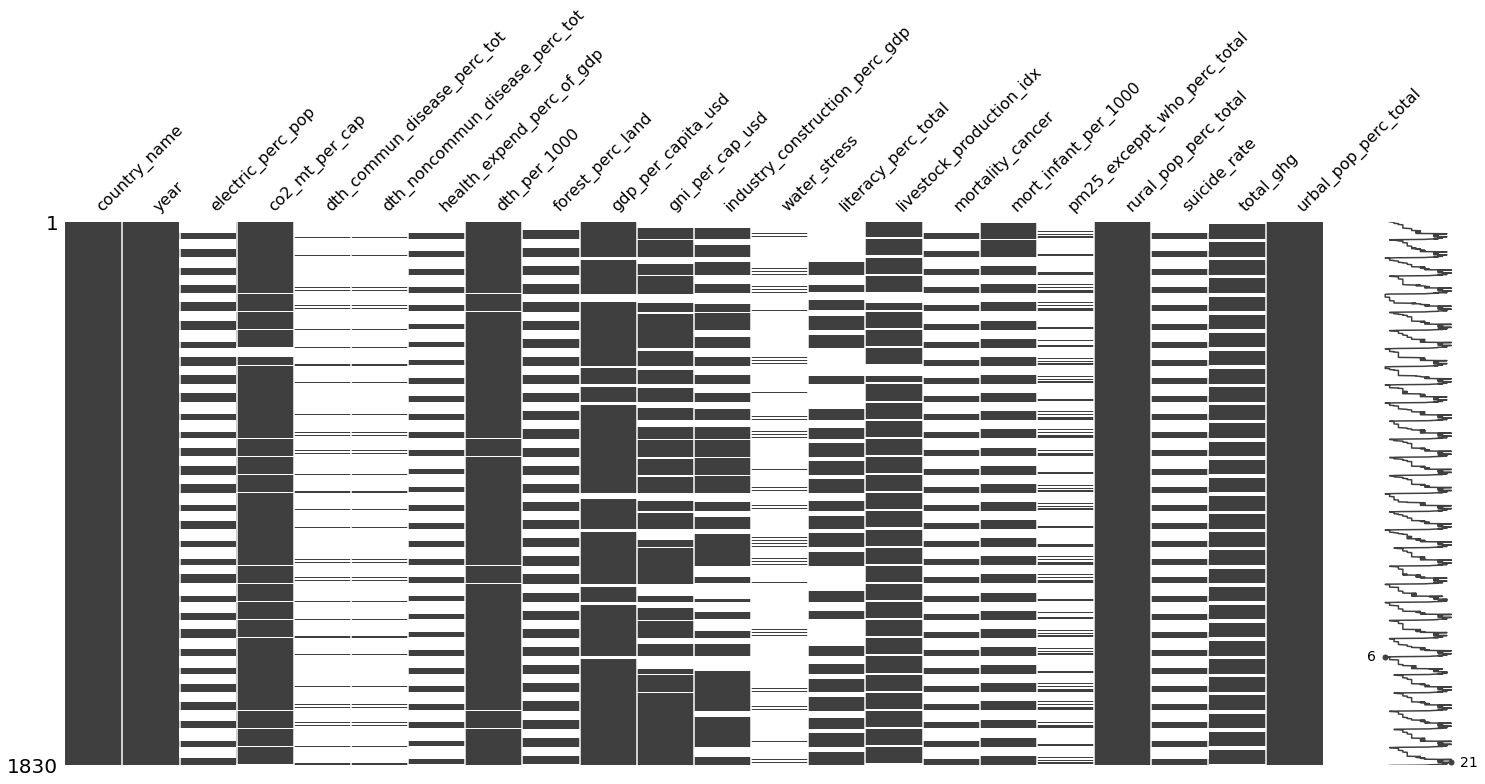

In [121]:
import missingno as msno

# Categories with most complete data
msno.matrix(df_rdy)

<AxesSubplot:>

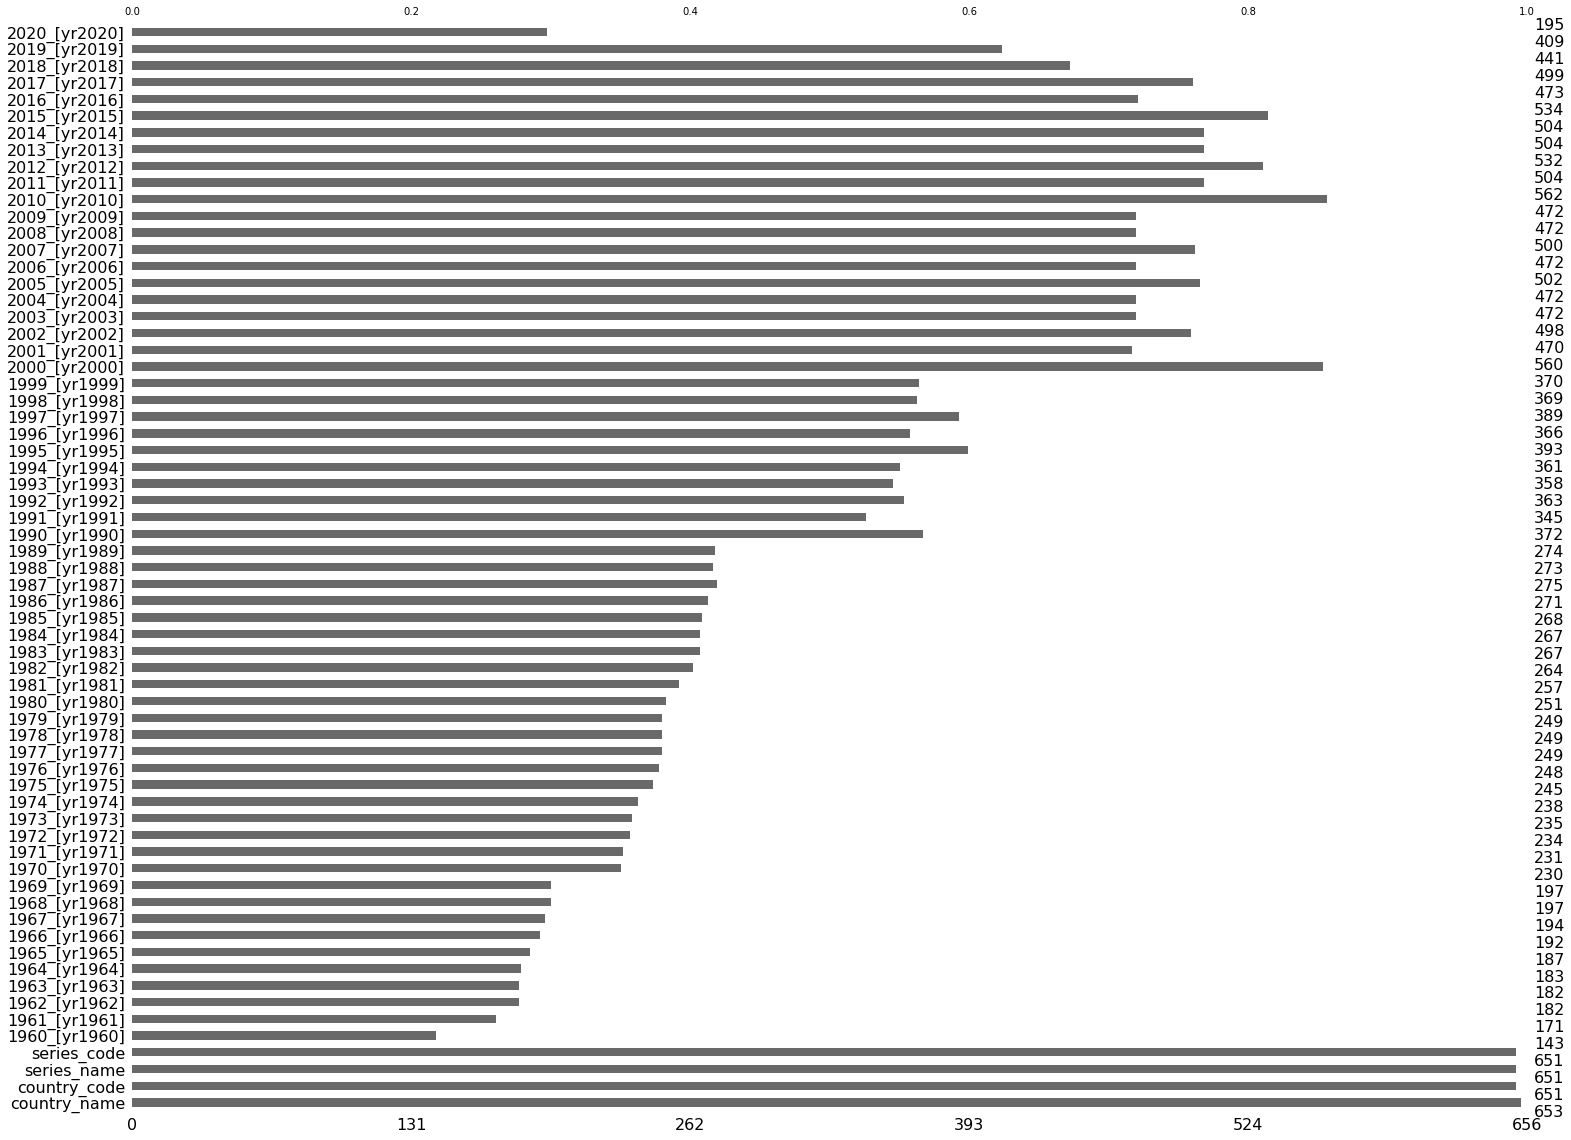

In [123]:
# Years with most complete data

msno.bar(df)


country_name                       0.00
rural_pop_perc_total               0.00
dth_per_1000                       0.00
urbal_pop_perc_total               0.00
year                               0.00
co2_mt_per_cap                     1.52
livestock_production_idx           3.64
gdp_per_capita_usd                 5.45
total_ghg                          9.09
gni_per_cap_usd                   20.00
industry_construction_perc_gdp    35.15
mort_infant_per_1000              42.73
literacy_perc_total               45.15
forest_perc_land                  45.45
pm25_exceppt_who_perc_total       45.45
electric_perc_pop                 57.27
suicide_rate                      63.64
water_stress                      63.64
health_expend_perc_of_gdp         63.64
mortality_cancer                  63.64
dth_noncommun_disease_perc_tot    72.73
dth_commun_disease_perc_tot       72.73
dtype: float64


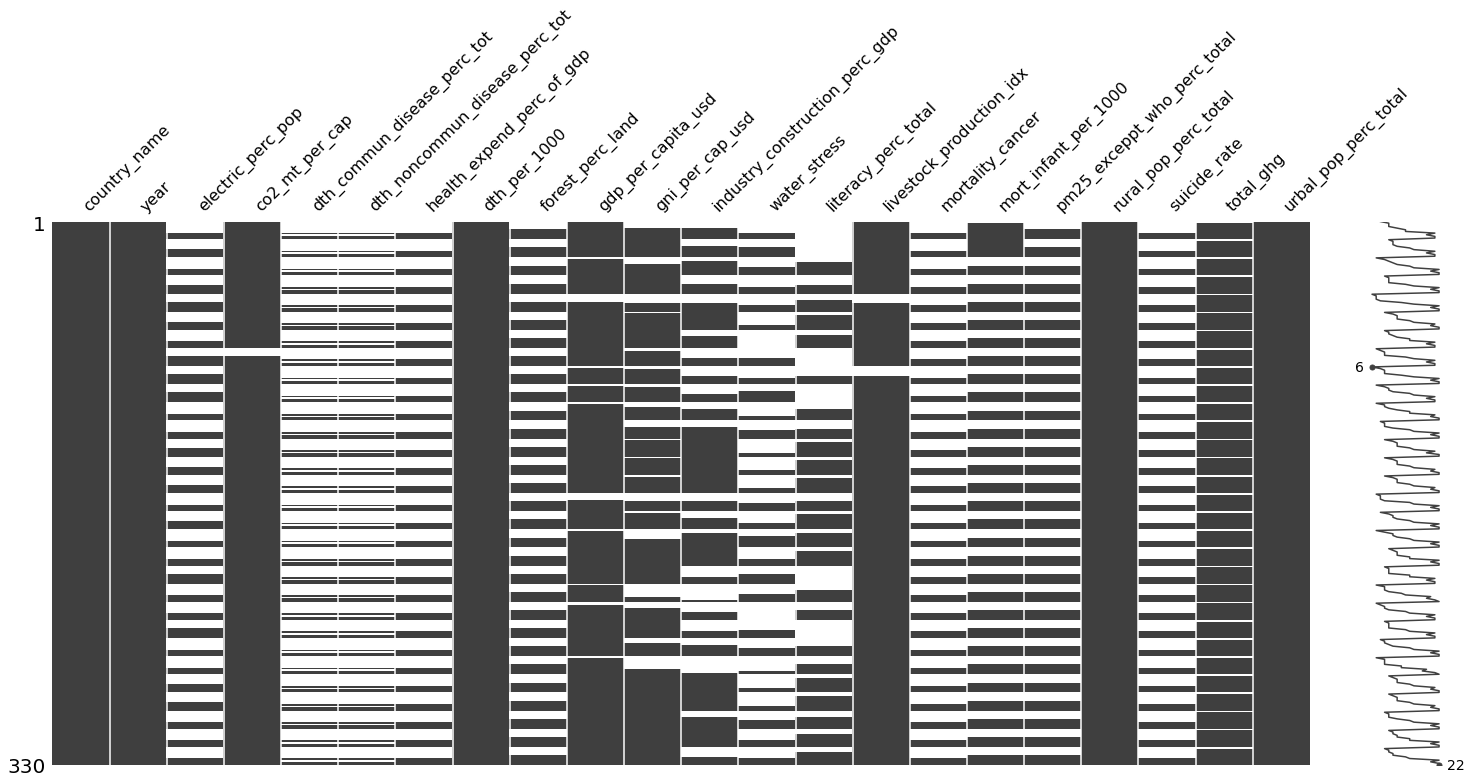

In [124]:
df_agg = df_rdy.groupby(['country_name', pd.cut(df_rdy.year, np.arange(1960, 2020, 5))]).mean().drop('year', 1).reset_index()

msno.matrix(df_agg)

s_sum_missing = ((df_agg.isna().sum() / df_agg.shape[0])*100).sort_values()
print(s_sum_missing)

<AxesSubplot:>

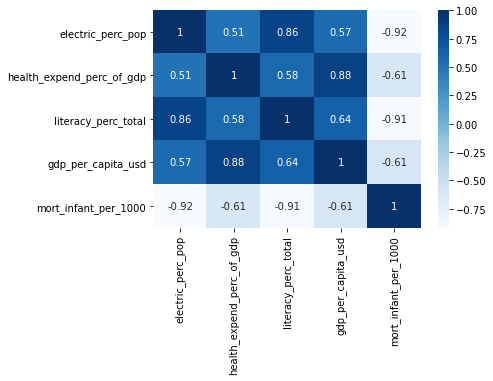

In [132]:
# Is there a correlation between "positive" indicators?
positive_indicators = ['electric_perc_pop', 'health_expend_perc_of_gdp', 'literacy_perc_total', 'gdp_per_capita_usd', 'mort_infant_per_1000']
df_agg.head()

import seaborn as sb
corr = df_agg[positive_indicators].corr()
sb.heatmap(corr, cmap='Blues', annot=True)


<AxesSubplot:>

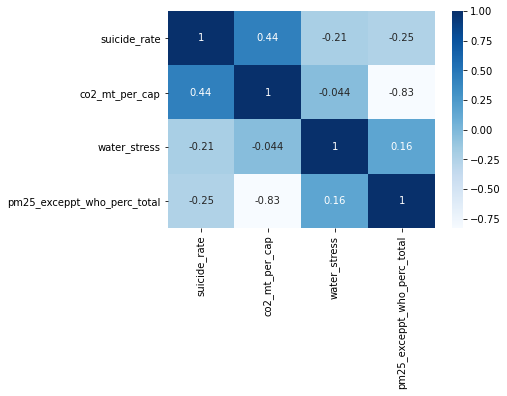

In [134]:
# Is there a correlation between "negative" indicators?
positive_indicators = ['suicide_rate', 'co2_mt_per_cap', 'water_stress', 'pm25_exceppt_who_perc_total']
df_agg.head()

import seaborn as sb
corr = df_agg[positive_indicators].corr()
sb.heatmap(corr, cmap='Blues', annot=True)

In [ ]:
# Is there a relationship between missing values and "positive indicators"?


In [135]:
print(s_sum_missing)

country_name                       0.00
rural_pop_perc_total               0.00
dth_per_1000                       0.00
urbal_pop_perc_total               0.00
year                               0.00
co2_mt_per_cap                     1.52
livestock_production_idx           3.64
gdp_per_capita_usd                 5.45
total_ghg                          9.09
gni_per_cap_usd                   20.00
industry_construction_perc_gdp    35.15
mort_infant_per_1000              42.73
literacy_perc_total               45.15
forest_perc_land                  45.45
pm25_exceppt_who_perc_total       45.45
electric_perc_pop                 57.27
suicide_rate                      63.64
water_stress                      63.64
health_expend_perc_of_gdp         63.64
mortality_cancer                  63.64
dth_noncommun_disease_perc_tot    72.73
dth_commun_disease_perc_tot       72.73
dtype: float64
